In [1]:
import numpy as np
import torch
from data.dataset import DatasetLoader, OneDDatasetLoader, OneDDatasetBuilder
import matplotlib.pyplot as plt
from preprocessing.batching import _get_graph_partition
from networks.loss import *
from preprocessing.normalize import normalize_graph
from networks.network_parc import PARC
from data.file_reader import *

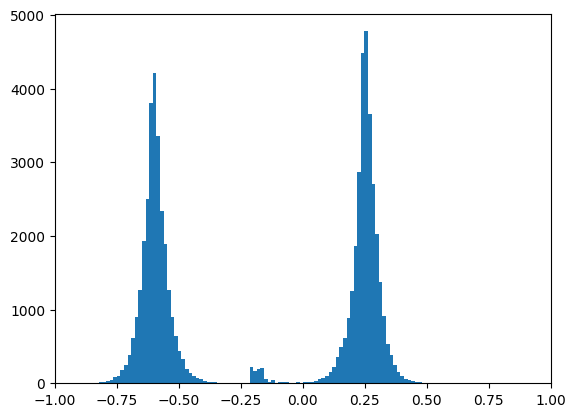

In [9]:
# Loading raw dataset
dataset = OneDDatasetLoader(
    root_dir='/data1/tam/downloaded_datasets_nodeattr_all'
)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# for i in range(dataset.len()):
#     y = dataset[i].flowrate.flatten()
#     print(y.min(), y.max())
#     plt.hist(y, bins=100)
# plt.show()

y_min = dataset.min('flowrate')
y_max = dataset.max('flowrate')
y = dataset[0].flowrate[:,100]

# for i in range(10):
y = y.sign()*torch.log10((y.abs())*1e10 + 1)
y_min = y_min.sign()*(torch.log10((y_min.abs())*1e13 + 1))
y_max = y_max.sign()*(torch.log10((y_min.abs())*1e13 + 1))
y = -1 + 2 * (y - y_min)/(y_max-y_min)


# print(y.min(), y.max(), y.mean(), y.median())
plt.xlim(-1,1)
plt.hist(y, bins=100)
plt.show()

In [ ]:
# process dataset all
dataset = OneDDatasetLoader(
    root_dir='/data1/tam/downloaded_datasets_nodeattr_all'
)

print('Start normalizing..')
_dataset = dataset.normalizing(
    sub_dir='/normalized/'
)
print('Finish normalizing.')

print('Start calculating derivative..')
__dataset = _dataset.calculate_derivative(
    sub_dir='/calculated/',
    var_name=['pressure', 'velocity'],
    axis=1,
    delta_t=0.02
)
print('Finish calculating derivative.')

# print('Start batching..')
# __dataset = _dataset.batching(batch_size=500, batch_n_times=40, recursive=True,
#                             sub_dir='/batched/')
# print('Finish batching.')

In [ ]:
dataset = OneDDatasetLoader(
    root_dir='/data1/tam/downloaded_datasets_nodeattr_all',
    # sub_dir='/normalized/'
)
dataset[0].pressure.min()


In [ ]:
from sklearn.compose import ColumnTransformer


In [ ]:
data = dataset_transformed[0]
# print(data)
graph_part = _get_graph_partition(data=data, partition=np.arange(5,15), recursive=True)
# print(graph_part)

In [ ]:
# Batching dataset
# batched_dataset = dataset_transformed.batching(batch_size=5000, batch_n_times=10, recursive=True,
#                                     sub_dir='/batched/')
dataset = OneDDatasetLoader(
    root_dir='/data1/tam/downloaded_datasets_nodeattr_all',
    sub_dir='/calculated/'
)

# vel_min = dataset.min('velocity')
vel_max = dataset.max('velocity').item()
vel_mean = dataset.mean('velocity').item()
vel_med = dataset.median('velocity').item()
# vel_dot_min = dataset.min('velocity_dot')
# vel_dot_max = dataset.max('velocity_dot')

# C = np.trunc(-np.log(np.abs(vel_max - vel_mean))) - 1

i = 50
# y = dataset[0].velocity_dot
# plt.plot(y)
z = dataset[0].velocity[:,i]
z = logarithmic_scaler(z, mean=vel_med, log_scale=10**12)
# z = -1 + 2*(z - z.min())/(z.max()-z.min())

plt.plot(z)
# plt.ylim([0,1e8])
plt.show()
plt.hist(z, bins=100)
plt.show()

In [ ]:
# Transforming/scaling dataset
dataset = dataset
p_min = dataset.min(var_name='pressure', axis=None).numpy()
p_max = dataset.max(var_name='pressure', axis=None).numpy()
print(p_min, p_max)
q_min = dataset.min(var_name='flowrate', axis=None).numpy()
q_max = dataset.max(var_name='flowrate', axis=None).numpy()
print(q_min, q_max)
u_min = dataset.min(var_name='velocity', axis=None).numpy()
u_max = dataset.max(var_name='velocity', axis=None).numpy()
print(u_min, u_max)

ea_min = dataset.min(var_name='edge_attr', axis=0).numpy()
ea_max = dataset.max(var_name='edge_attr', axis=0).numpy()
vol0_min = ea_min[-2]
vol1_min = ea_min[-1]
vol0_max = ea_max[-2]
vol1_max = ea_max[-1]
ea_min[-2] = min(vol0_min, vol1_min)
ea_min[-1] = min(vol0_min, vol1_min)
ea_max[-2] = max(vol0_max, vol1_max)
ea_max[-1] = max(vol0_max, vol1_max)
print(ea_min, ea_max)


# p_mean = dataset.mean(var_name='pressure', axis=None).numpy()
# p_std = dataset.std(var_name='pressure', axis=None).numpy()
# print(p_mean, p_std)
# q_mean = dataset.mean(var_name='flowrate', axis=None).numpy()
# q_std = dataset.std(var_name='flowrate', axis=None).numpy()
# print(q_mean, q_std)
# u_mean = dataset.mean(var_name='velocity', axis=None).numpy()
# u_std = dataset.std(var_name='velocity', axis=None).numpy()
# print(u_mean, u_std)

In [ ]:
# Ploting pressure distribution
# print(__dataset[0])
y = __dataset[0].pressure.numpy()[:,50]

# p = -1+2*(p-p_min)/(p_max-p_min)
# p = (p-p_mean)/(p_std+1e-10)
plt.ylim(-1,1)
# plt.hist(p, bins=1000)
plt.plot(y)
# plt.ylim(-1,1)
plt.show()
plt.hist(y, bins=100)
plt.show()

In [ ]:
# Ploting flowrate distribution

q = dataset[0].flowrate.numpy()[50000,:]

# q = (q-q_mean)/(q_std+1e-10)
# q = -1+2*(q-q_min)/(q_max-q_min)
# plt.xlim(-1,1)
# plt.hist(q, bins=10)
plt.plot(list(range(len(q))), q)
plt.show()

In [ ]:
# Plot volume
vol0_raw = dataset_raw[0].edge_attr[:,-2].numpy()
vol0_transformed = dataset_transformed[0].edge_attr[:,-1].numpy()
print(vol0_raw.shape, vol0_transformed.shape)
print(vol0_raw[1000], vol0_transformed[1000])

print(vol0_raw.mean(), vol0_raw.std())
print(vol0_transformed.mean(), vol0_transformed.std())

# v_min = min(vol0.min(), vol1.min())
# v_max = max(vol0.max(), vol1.max())

# vol0 = -1+2*(vol0 - v_min)/(v_max - v_min)
# vol1 = -1+2*(vol1 - v_min)/(v_max - v_min)

# vol0 = (vol0 - vol0.mean())/(vol0.std() + 1e-10)
# vol1 = (vol1 - vol1.mean())/(vol1.std() + 1e-10)

# vol0 = (vol0 - vol0.min())/(vol0.max() + vol0.min())
# vol1 = (vol1 - vol1.min())/(vol1.max() + vol0.min())


# vol0 = (vol0 - np.median(vol0))/(np.percentile(vol0, 75) - np.percentile(vol0, 25))
# vol1 = (vol1 - np.median(vol1))/(np.percentile(vol1, 75) - np.percentile(vol1, 25))

# plt.plot(list(range(vol0.shape[0])), vol0, c='red')
# plt.plot(list(range(vol0.shape[0])), vol1, c='blue')
# plt.xlim(4350, 4450)
# plt.ylim(-0.98,-0.88)

plt.plot(vol0_raw)
# plt.plot(vol0_transformed)

plt.show()

In [ ]:
# Correlation scatter plot
data = dataset[0]
x = data.edge_attr.numpy()[:,6]
# y = data.velocity.numpy()[:,50]
y = data.flowrate.numpy().mean(axis=1)

y = (y - u_min)/(u_max - u_min)
# y = np.sign(y)*np.log(1. + np.abs(y)/1e2)
# d = data.edge_attr.numpy()[:,1]
# y = y / (np.square(d))
plt.scatter(x, y)
plt.show()

In [ ]:
# test normalize
# data = dataset[0]
# print(data)
# data = normalize_graph(
#     data=data,
#     # x_min=0, x_max=512,
#     edge_attr_min=ea_min, edge_attr_max=ea_max,
#     pressure_min=p_min, pressure_max=p_max,
#     velocity_min=u_min, velocity_max=u_max
# )
# print(data)
# plt.plot(data.flowrate_bc[1000,:])
# plt.show()

# y_true = data.velocity[:,8]
# y_pred = data.velocity[:,9]
# print(y_true, y_pred, data.weight)
# plt.plot(y_true)
# plt.plot(y_pred)
# plt.show()

# loss = weighted_mean_squared_error(y_pred, y_true, torch.tensor(data.weight))
# print(loss)



In [ ]:
# calculate weighted loss
data = normed_data
diam = data.edge_attr.numpy()[:,0]
length = data.edge_attr.numpy()[:,1]

(count, bins) = np.histogram(diam, bins=5000)
n_edge = diam.shape[0]

# print(count)
# print(bins)

def weight(val : float):
    bin_id = np.where(bins >= val)[0][0] - 1
    weight_mean = 1. / (count[bin_id] + 1e0)
    return weight_mean

v_weight = np.vectorize(weight)
weight_diam = v_weight(diam)


def cal_weight(x : np.array, bins=1000) -> np.array:
    (count, bin) = np.histogram(x, bins=bins)
    N = x.shape[0]

    def _weight(value : float):
        _bin_id = np.where(bin >= value)[0][0] - 1
        _weight = 1. / (count[_bin_id] + 1.)
        return _weight
    
    v_weight = np.vectorize(_weight)

    return v_weight(x)

plt.plot(bins[:-1], count)
plt.show()

plt.plot(weight_diam)
# plt.xlim(21000,21025)
plt.show()

In [ ]:
# Test batching BFS
import random
data = dataset[0]
def BFS_partition(edge_index, partition_size=None, n_partitions=None):
    def BFS(edge_index, root, visited, part_size=100):
        queue = [root]
        visited = []
        part = []
        while queue:
            current = queue.pop(0)
            while current in visited:
                current = queue.pop(0)
            visited.append(current)
            part.append(current)
            # find child nodes
            child_edges = np.where(edge_index[0] == current)[0]
            child_nodes = list(edge_index[1][child_edges])
            # add child nodes to queue
            queue += child_nodes
            # break
            if len(part) >= part_size:
                break
        return part, queue, visited
    
    if partition_size is None:
        partition_size = int((edge_index.shape[1] + 1)/n_partitions)
    root_queue = [0]
    visited = []
    partitions = []
    root_parrent = [0]
    
    while root_queue:
        root = root_queue.pop(0)
        parrent = root_parrent.pop(0)
        partition, queue, visited = BFS(edge_index, root, visited, partition_size)
        root_queue += queue
        root_parrent += [len(partitions)] * len(queue)
        if len(partition) >= 0.5*partition_size:
            partitions.append(partition)
        else:
            partitions[parrent] += partition
    return partitions

        
parts = BFS_partition(data.edge_index.numpy(), n_parts=5000)
parts


In [ ]:
data = dataset[10]
from preprocessing.batching import get_batch_graphs
batch_graphs = get_batch_graphs(data=data, batch_size=None, batch_n_times=100, recursive=False)
count = 0
for graph in batch_graphs:
    count += data.x.size()[0] - data.edge_attr.size()[0]
# print(count, len(batch_graphs))
print(data)
print(len(batch_graphs))

In [ ]:
# Test merge data
datas = batch_graphs
# print(datas[0]._store)
# x = torch.tensor([])
# edge_index = torch.tensor([])
# edge_attr = torch.tensor([])
# for data in datas:
#     _edge_index = data.edge_index + x.size(0)
#     print(_edge_index)
#     edge_index = torch.cat([edge_index, _edge_index], dim=1)
#     x = torch.cat([x, data.x], dim=0)
#     edge_attr = torch.cat([edge_attr, data.edge_attr], dim=0)

from typing import List
from data.data import TorchGraphData
def merge_graphs(datas : List[TorchGraphData]):
    keys = list(datas[0]._store.keys())
    data_dict = {}
    for key in keys:
        data_dict[key] = []
    node_count = 0
    for data in datas:
        data_dict['edge_index'].append(data.edge_index + node_count)
        for key in keys:
            if key == 'edge_index':
                continue
            data_dict[key].append(data._store[key])
        node_count += data.x.size(0)
    merged_data = TorchGraphData()
    for key in data_dict:
        if key == 'edge_index':
            setattr(merged_data, key, torch.cat(data_dict[key], dim=1))
        else:
            setattr(merged_data, key, torch.cat(data_dict[key], dim=0))
    return merged_data

data = merge_graphs(datas)
data
# print(x.size(), edge_index.size(), edge_attr.size())

In [ ]:
# test graph partition
data = _dataset[0]
_get_graph_partition(
    data=data,
    partition=list(range(10,35)),
    recursive=False
)

In [ ]:
# derivative
def cal_derivative(F : torch.Tensor, dim : int = -1, delta_t : float = 1.) -> torch.Tensor:
    _F = F.transpose(0, dim)
    deriv_F = []
    for i in range(1, _F.size(0)):
        deriv_F_i = (_F[i] - _F[i-1]) / delta_t
        deriv_F.append(deriv_F_i.unsqueeze(dim))
    return torch.cat(deriv_F, dim=dim)

data = dataset[0]
Fs_hat = data.velocity.unsqueeze(-1)
F_dots_hat = cal_derivative(Fs_hat, dim=1, delta_t=0.02)
Fs_hat = Fs_hat[:,1:,:]

plt.plot(F_dots_hat[50000, :, :])
plt.show()

In [ ]:
import numpy as np
def group_by(x, batch):
    labels = np.unique(batch)
    x_labels = np.zeros_like(labels)
    for label in labels:
        label_index = np.where(batch == label)[0]
        x_label = x[label_index]
        x_labels[label] = np.mean(x_label)
    return labels, x_labels

x_dl = dataset[0].flowrate[:, 50].numpy()
batch = dataset[0].node_attr[:,5].numpy().astype(int)

x_vd = dataset[1].flowrate[:, 50].numpy()

label, x_label_vd = group_by(x_vd, batch)
label, x_label_dl = group_by(x_dl, batch)

import matplotlib.pyplot as plt
# plt.bar(label - 0.2, -x_label_vd, 0.4, color='tab:blue', label='Taubin')
# plt.bar(label + 0.2, -x_label_dl, 0.4, color='tab:orange', label='AMSL')

plt.plot(-x_label_vd, color='tab:blue', label='Taubin')
plt.plot(-x_label_dl, color='tab:orange', label='AMSL')

# plt.xlim(0,25)
plt.ylim(-1e-8,1e-8)
plt.legend()
plt.xlabel('Generations', size=12)
plt.ylabel('Pressure drop [Pa]', size=12)
# plt.xticks([0, 1, 2, 3, 4, 5], ['Central', 'RUL', 'RML', 'RLL', 'LUL', 'LLL'])
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

xlist = np.linspace(-10.0, 10.0, 200)
ylist = np.linspace(-10.0, 10.0, 200)
X, Y = np.meshgrid(xlist, ylist)

plt.figure(figsize=(10,10))
Z = -((X-7)**2 + (Y+8)**2)
plt.contourf(X, Y, Z, cmap=cm.jet)


plt.show()